## KNN Classifier

In [1]:
# Used for recommendation systems, like amazon classifying products, flipkart, semantic searching in google search related to search words
# KNN is K- Nearest Neighbour
# K is a number with respect to nearest neighbours
# Classes are nothing but categories
# Use KNN method, when data is labelled properly, when data is small like 10000 records.
# KNN used Euclidean distance for k values
# 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Importing  the dataset
dataset = pd.read_csv('C:\\Users\\a5jw5zz\\Desktop\\Onefolder\\Personal\\Python-AI\\Datasets-20190424T022103Z-001\\Datasets\\diabetes.csv')
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

In [6]:
dataset.isnull() # Check if any null values are present

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


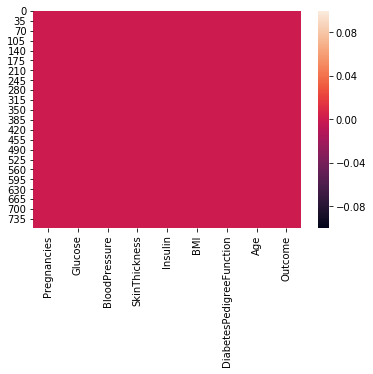

In [7]:
sb.heatmap(dataset.isnull()) # Put it on heat map an check null values heat map

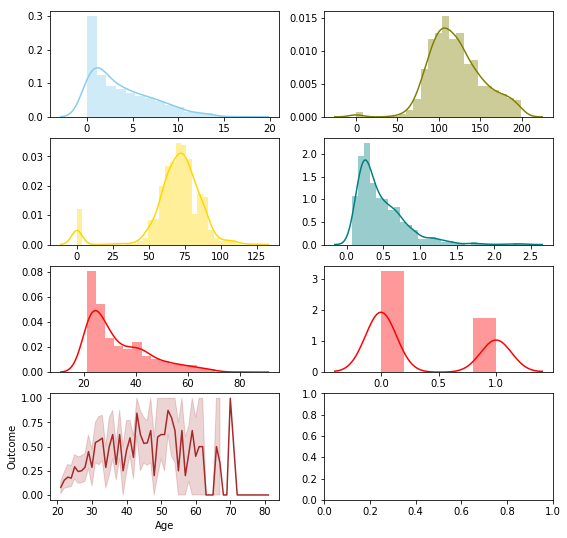

In [8]:
f, axes = plt.subplots(4,2,figsize=(9,9))
sb.distplot(dataset["Pregnancies"], color = 'Skyblue', ax = axes[0,0])
sb.distplot(dataset["Glucose"], color = 'olive', ax = axes[0,1])
sb.distplot(dataset["BloodPressure"], color = 'gold', ax = axes[1,0])
sb.distplot(dataset["DiabetesPedigreeFunction"], color = 'teal', ax = axes[1,1])
sb.distplot(dataset["Age"], color = 'red', ax = axes[2,0])
sb.distplot(dataset["Outcome"], color = 'red', ax = axes[2,1])
sb.lineplot(dataset["Age"], dataset["Outcome"],color = 'brown', ax = axes[3,0])

In [9]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


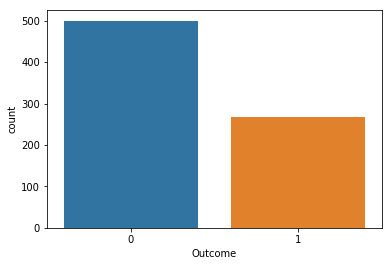

In [10]:
sb.countplot(dataset['Outcome'],label ='count')

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

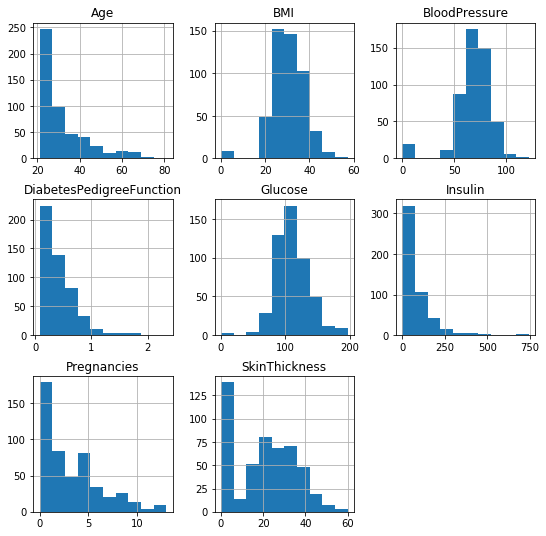

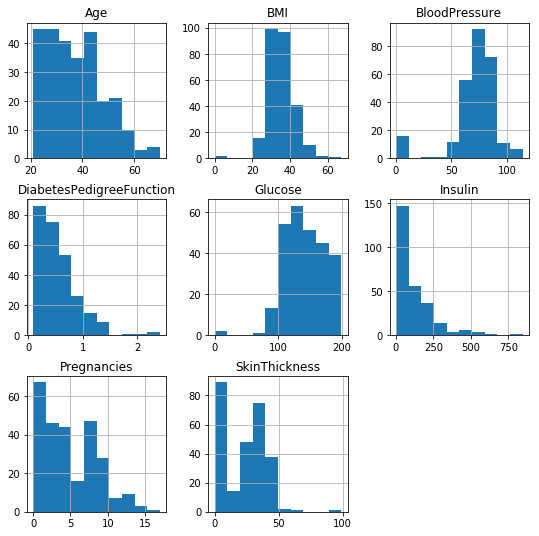

In [11]:
dataset.groupby('Outcome').hist(figsize=(9,9)) # Histogram grpah method basis outcome

In [12]:
# Splitting the dataset into trainingset and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:,dataset.columns!='Outcome'],dataset['Outcome'],test_size=0.1, stratify = dataset['Outcome'], random_state = 66)

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
743,9,140,94,0,0,32.7,0.734,45
535,4,132,0,0,0,32.9,0.302,23
421,2,94,68,18,76,26.0,0.561,21
654,1,106,70,28,135,34.2,0.142,22
549,4,189,110,31,0,28.5,0.680,37
590,11,111,84,40,0,46.8,0.925,45
268,0,102,52,0,0,25.1,0.078,21
403,9,72,78,25,0,31.6,0.280,38
598,1,173,74,0,0,36.8,0.088,38
89,1,107,68,19,0,26.5,0.165,24


In [14]:
## Records kept for testing
pd.concat((X_test,y_test),axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
74,1,79,75,30,0,32.0,0.396,22,0
84,5,137,108,0,0,48.8,0.227,37,1
534,1,77,56,30,56,33.3,1.251,24,0
404,5,168,64,0,0,32.9,0.135,41,1
497,2,81,72,15,76,30.1,0.547,25,0
190,3,111,62,0,0,22.6,0.142,21,0
517,7,125,86,0,0,37.6,0.304,51,0
614,11,138,74,26,144,36.1,0.557,50,1
471,0,137,70,38,0,33.2,0.170,22,0
510,12,84,72,31,0,29.7,0.297,46,1


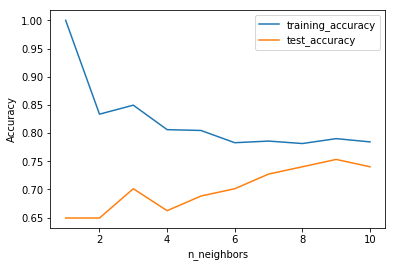

In [15]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label = "training_accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [16]:
# Basis above K=9 as graphs almost coincide at 8 and 10 of x value.

In [17]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [18]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(X_train,y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.75


In [19]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

## ROC Curve

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color ='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positve Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

In [45]:
probs = knn.predict_proba(X_test)
probs

array([[0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.44444444, 0.55555556],
       [0.33333333, 0.66666667],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [0.33333333, 0.66666667],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.44444444, 0.55555556],
       [0.22222222, 0.77777778],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [1.

In [46]:
probs = probs[:,1]
probs

array([0.11111111, 0.77777778, 0.        , 0.77777778, 0.        ,
       0.        , 0.55555556, 0.66666667, 0.22222222, 0.44444444,
       0.66666667, 1.        , 0.33333333, 0.33333333, 0.11111111,
       0.66666667, 0.22222222, 0.        , 0.        , 0.11111111,
       0.        , 0.11111111, 0.77777778, 0.        , 0.33333333,
       0.55555556, 0.77777778, 0.22222222, 0.44444444, 0.11111111,
       0.        , 0.55555556, 0.44444444, 0.33333333, 0.88888889,
       0.44444444, 0.44444444, 0.44444444, 0.        , 0.55555556,
       0.55555556, 0.66666667, 0.11111111, 0.22222222, 0.22222222,
       0.11111111, 0.22222222, 0.11111111, 0.77777778, 0.44444444,
       0.22222222, 0.44444444, 0.22222222, 0.44444444, 0.55555556,
       0.66666667, 0.55555556, 0.11111111, 0.33333333, 0.33333333,
       0.55555556, 0.11111111, 0.44444444, 0.33333333, 0.44444444,
       0.11111111, 0.55555556, 0.33333333, 0.        , 0.66666667,
       0.        , 0.44444444, 0.        , 1.        , 0.11111

In [47]:
auc = roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.80


In [48]:
fpr,tpr,threshholds = roc_curve(y_test,probs)

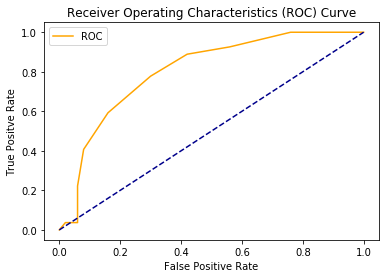

In [49]:
plot_roc_curve(fpr,tpr)